# Estadística en la ingesta de datos

## 1. Procesamiento de datos numéricos en Python

In [30]:
# Medir el tiempo de ejecución de los modelos
import timeit
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model

In [2]:
# Cargar dataset
X, y = datasets.load_diabetes(return_X_y= True)
# Transformación en las dimensiones, para que se ajuste al formato de entrada al momento del preprocesamiento
raw = X[:, None, 2]

In [3]:
raw

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215],
       [-0.08380842],
       [ 0.01750591],
       [-0.02884001],
       [-0.00189471],
       [-0.02560657],
       [-0.01806189],
       [ 0.04229559],
       [ 0.01211685],
       [-0.0105172 ],
       [-0.01806189],
       [-0.05686312],
       [-0.02237314],
       [-0.00405033],
       [ 0.06061839],
       [ 0.03582872],
       [-0.01267283],
       [-0.07734155],
       [ 0.05954058],
       [-0.02129532],
       [-0.00620595],
       [ 0.04445121],
       [-0.06548562],
       [ 0.12528712],
       [-0.05039625],
       [-0.06332999],
       [-0.03099563],
       [ 0.02289497],
       [ 0.01103904],
       [ 0.07139652],
       [ 0.01427248],
       [-0.00836158],
       [-0.06764124],
       [-0.0105172 ],
       [-0.02345095],
       [ 0.06816308],
       [-0

In [4]:
print(f'max: {max(raw)}, min: {min(raw)}')

max: [0.17055523], min: [-0.0902753]


Reglas de escalamiento

In [5]:
# min. - max. 
max_raw = max(raw)
min_raw = min(raw)
scaled = (2*raw - max_raw - min_raw) / (max_raw - min_raw)
scaled

array([[ 1.65289256e-01],
       [-7.02479339e-01],
       [ 3.30578512e-02],
       [-3.96694215e-01],
       [-5.86776860e-01],
       [-6.19834711e-01],
       [-6.69421488e-01],
       [-3.22314050e-01],
       [ 1.65289256e-01],
       [-8.26446281e-03],
       [-9.50413223e-01],
       [-1.73553719e-01],
       [-5.28925620e-01],
       [-3.22314050e-01],
       [-5.04132231e-01],
       [-4.46280992e-01],
       [ 1.65289256e-02],
       [-2.14876033e-01],
       [-3.88429752e-01],
       [-4.46280992e-01],
       [-7.43801653e-01],
       [-4.79338843e-01],
       [-3.38842975e-01],
       [ 1.57024793e-01],
       [-3.30578512e-02],
       [-4.04958678e-01],
       [-9.00826446e-01],
       [ 1.48760331e-01],
       [-4.71074380e-01],
       [-3.55371901e-01],
       [ 3.30578512e-02],
       [-8.09917355e-01],
       [ 6.52892562e-01],
       [-6.94214876e-01],
       [-7.93388430e-01],
       [-5.45454545e-01],
       [-1.32231405e-01],
       [-2.23140496e-01],
       [ 2.3

(array([32., 66., 98., 90., 64., 50., 23., 12.,  5.,  2.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

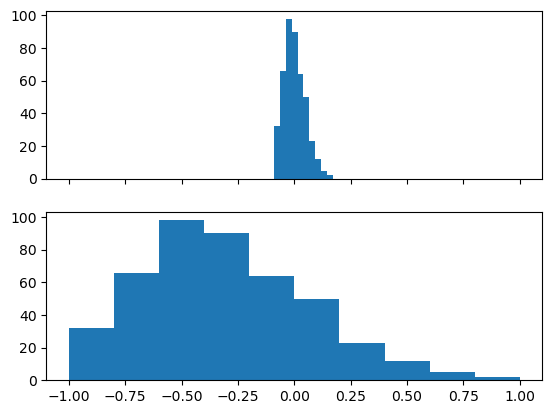

In [7]:
# Grafica de los datos originales y escalados
fig, axs = plt.subplots(2, 1, sharex= True)

axs[0].hist(raw)
axs[1].hist(scaled)

In [8]:
# Validar que al entrenar un modelo, el efecto del escalamiento es realmente apropiado
# Entrenar el modelo con una función con los datos NO escalados
def train_raw():
    # Con linear_model usar una regresiòn lineal, ajustado a los datos, que serian los datos crudos (raw)  y la variable 'y' (variable a predecir)
    linear_model.LinearRegression().fit(raw, y)

In [9]:
# Entrenar el modelo con una función, con los datos escalados
def train_scaled():
    linear_model.LinearRegression().fit(scaled, y)

In [10]:
# Calcular los tiempos de ejecuciòn de los modelos con la libreria timeit
raw_time = timeit.timeit(train_raw, number = 100)
scaled_time = timeit.timeit(train_scaled, number = 100)

print(f'train_raw: {raw_time}')
print(f'scaled_time: {scaled_time}')

train_raw: 0.24382940000009512
scaled_time: 0.07665449999990415


In [11]:
# Z-Score
mean = raw.mean()
std = raw.std()

scaled = (raw - mean) / std
scaled

array([[ 1.29708846],
       [-1.08218016],
       [ 0.93453324],
       [-0.24377122],
       [-0.76494435],
       [-0.85558315],
       [-0.99154136],
       [-0.03983391],
       [ 1.29708846],
       [ 0.82123474],
       [-1.7619712 ],
       [ 0.36804071],
       [-0.60632644],
       [-0.03983391],
       [-0.53834734],
       [-0.37972943],
       [ 0.88921384],
       [ 0.25474221],
       [-0.22111152],
       [-0.37972943],
       [-1.19547867],
       [-0.47036823],
       [-0.08515331],
       [ 1.27442876],
       [ 0.75325563],
       [-0.26643092],
       [-1.62601299],
       [ 1.25176906],
       [-0.44770853],
       [-0.13047271],
       [ 0.93453324],
       [-1.37675628],
       [ 2.63401083],
       [-1.05952046],
       [-1.33143688],
       [-0.65164584],
       [ 0.48133922],
       [ 0.23208251],
       [ 1.50102577],
       [ 0.30006161],
       [-0.17579212],
       [-1.42207568],
       [-0.22111152],
       [-0.49302793],
       [ 1.43304667],
       [-0

(array([32., 66., 98., 90., 64., 50., 23., 12.,  5.,  2.]),
 array([-1.89792941, -1.34956464, -0.80119987, -0.2528351 ,  0.29552967,
         0.84389444,  1.39225921,  1.94062398,  2.48898875,  3.03735352,
         3.58571828]),
 <BarContainer object of 10 artists>)

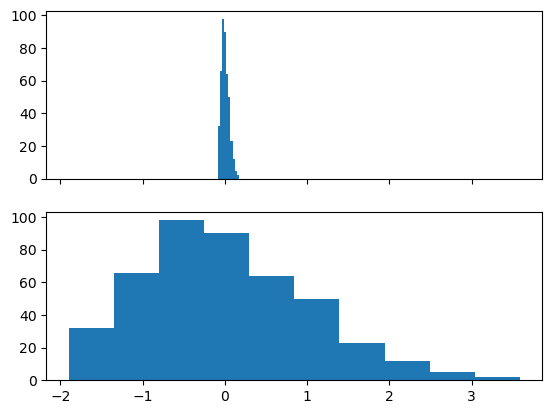

In [12]:
# Grafica de los datos originales y escalados
fig, axs = plt.subplots(2, 1, sharex= True)

axs[0].hist(raw)
axs[1].hist(scaled)

In [13]:
def train_raw():
    linear_model.LinearRegression().fit(raw, y)

def train_scaled():
    linear_model.LinearRegression().fit(scaled, y)

In [14]:
# Calcular los tiempos de ejecuciòn de los modelos con la libreria timeit
raw_time = timeit.timeit(train_raw, number = 100)
scaled_time = timeit.timeit(train_scaled, number = 100)

print(f'train_raw: {raw_time}')
print(f'scaled_time: {scaled_time}')

train_raw: 0.16646749999995336
scaled_time: 0.15126119999990806


In [15]:
# Transformaciones NO lineales
df = pd.read_csv('cars.csv')
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


<AxesSubplot:>

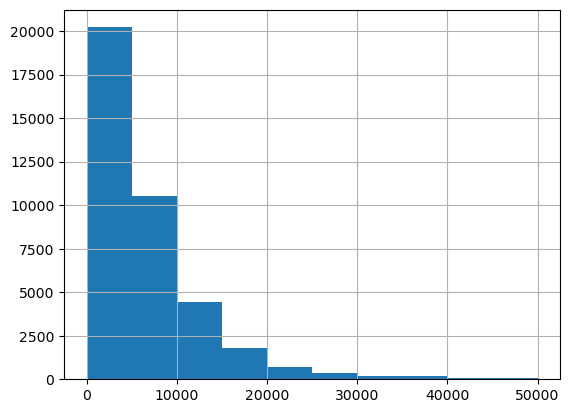

In [16]:
df['price_usd'].hist()

<AxesSubplot:>

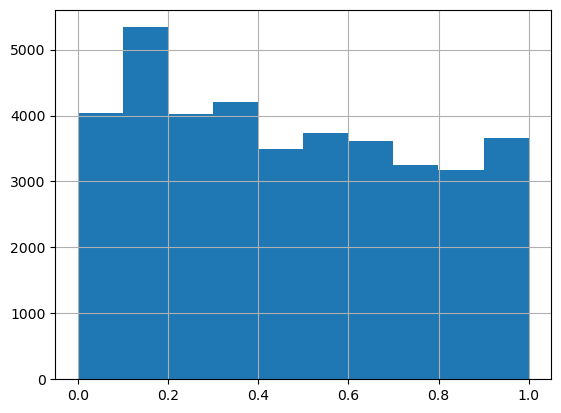

In [18]:
# Transformación con tanh(x)
a = 10000
df['price_usd'].apply(lambda x : np.tanh(x/a)).hist()

## 2. Procesamiento de variables categóricas en Python

In [21]:
# En realidad, es un one-hot, pero le dicen dummies
pd.get_dummies(df['engine_type'])

,diesel,electric,gasoline
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
38526,0,0,1
38527,1,0,0
38528,0,0,1
38529,0,0,1


In [22]:
# Reglas de procesamiento en sklearn
import sklearn.preprocessing as preprocessing
encoder = preprocessing.OneHotEncoder(handle_unknown='ignore')

In [23]:
encoder.fit(df[['engine_type']].values)

OneHotEncoder(handle_unknown='ignore')

In [24]:
encoder.transform([['gasoline'], ['disel'], ['water']]).toarray()

array([[0., 0., 1.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [25]:
# Variables numéricas discretas pueden ser codificadas como categorias
encoder.fit(df[['year_produced']].values)

OneHotEncoder(handle_unknown='ignore')

In [26]:
encoder.transform([[2016], [2009], [1900]]).toarray()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

## 3. Matriz de covarianza

In [27]:
# Escalamiento
from sklearn.preprocessing import StandardScaler

In [31]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


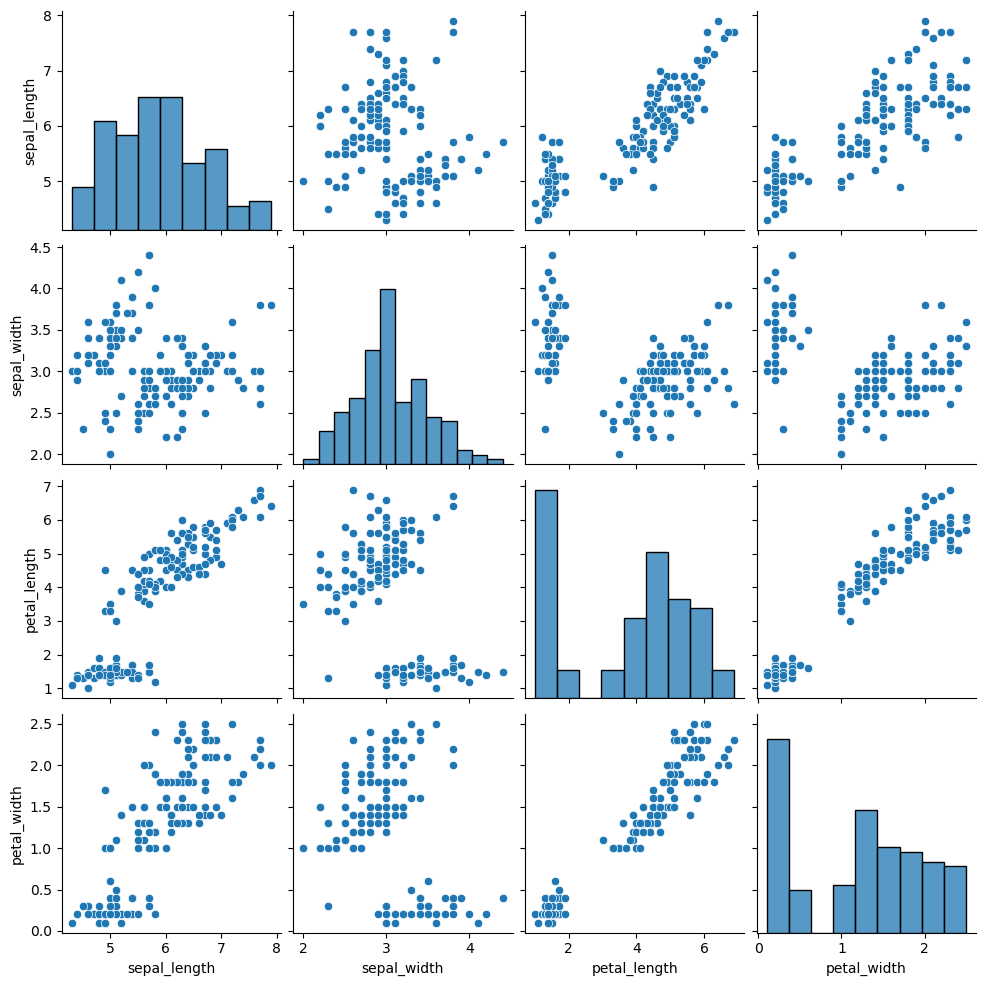

In [32]:
# Matriz de visualizaciones, donde cada elemento de la matriz es un grafico de dispersión segun cada una de las variables del dataset
# En la diagonal, muestra el histograma (distribución de la variable)
sns.pairplot(iris)

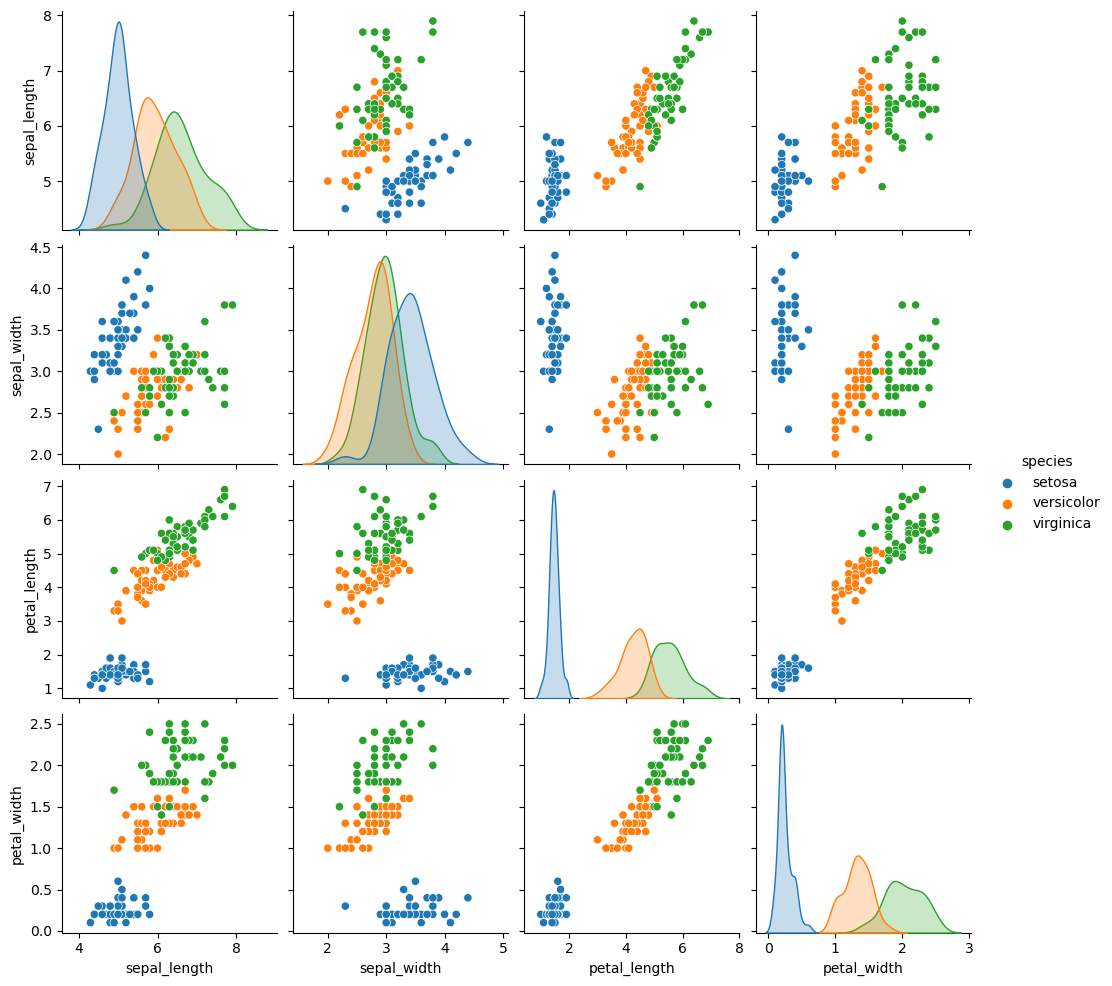

In [33]:
sns.pairplot(iris, hue = 'species')

In [35]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [36]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [37]:
scaler = StandardScaler()
scaler

StandardScaler()

In [38]:
type(scaler)

sklearn.preprocessing._data.StandardScaler

In [39]:
scaled = scaler.fit_transform(
    iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [40]:
# Transponer los datos
scaled.T

array([[-9.00681170e-01, -1.14301691e+00, -1.38535265e+00,
        -1.50652052e+00, -1.02184904e+00, -5.37177559e-01,
        -1.50652052e+00, -1.02184904e+00, -1.74885626e+00,
        -1.14301691e+00, -5.37177559e-01, -1.26418478e+00,
        -1.26418478e+00, -1.87002413e+00, -5.25060772e-02,
        -1.73673948e-01, -5.37177559e-01, -9.00681170e-01,
        -1.73673948e-01, -9.00681170e-01, -5.37177559e-01,
        -9.00681170e-01, -1.50652052e+00, -9.00681170e-01,
        -1.26418478e+00, -1.02184904e+00, -1.02184904e+00,
        -7.79513300e-01, -7.79513300e-01, -1.38535265e+00,
        -1.26418478e+00, -5.37177559e-01, -7.79513300e-01,
        -4.16009689e-01, -1.14301691e+00, -1.02184904e+00,
        -4.16009689e-01, -1.14301691e+00, -1.74885626e+00,
        -9.00681170e-01, -1.02184904e+00, -1.62768839e+00,
        -1.74885626e+00, -1.02184904e+00, -9.00681170e-01,
        -1.26418478e+00, -9.00681170e-01, -1.50652052e+00,
        -6.58345429e-01, -1.02184904e+00,  1.40150837e+0

In [41]:
convariance_matrix = np.cov(scaled.T)
convariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

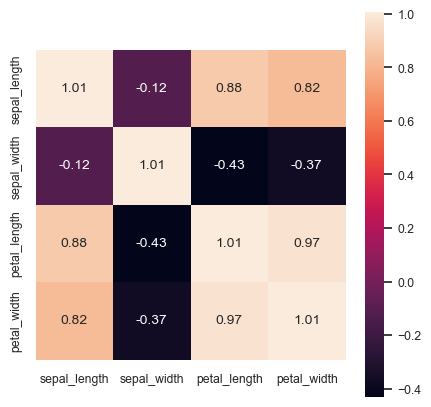

In [48]:
# Mapa de calor
plt.figure(figsize=(5,5))

sns.set(font_scale = 0.8)

hm = sns.heatmap(convariance_matrix,
                 cbar = True,
                 annot = True,
                 square = True,
                 fmt = '.2f',
                 annot_kws = {'size' : 10},
                 yticklabels = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
                 xticklabels = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])